# SPARQL about van Gogh

<div style="color: red; font-style: italic;">Note: when viewed through <span style="font-style: normal; font-weight: bold;">nbviewer</span> or converted through <span style="font-style: normal; font-weight: bold;">nbconvert</span> this notebook looks slightly different than when rendered by a running <em>sparqlkernel</em>. See a <a href="http://htmlpreview.github.io/?https://github.com/paulovn/sparql-kernel/blob/master/examples/sparql-vanGogh.html">converted version</a> for an example more similar to the actual look in a "live" kernel.</div>

We are going to use some the [DBPedia SPARQL endpoint](http://wiki.dbpedia.org/OnlineAccess#1.1%20Public%20SPARQL%20Endpoint) to do some queries related to _Vincent van Gogh_.

First we define the endpoint and the preferred language for labels

In [1]:
%endpoint http://dbpedia.org/sparql
%lang en

# This is optional, it would increase the log level.
# The default logfile (unless changed upon kernel installation) is [TMPDIR]/sparqlkernel.log, 
# where [TMPDIR] is the platform default temporal directory
%log debug

Endpoint set to: http://dbpedia.org/sparql
Label preferred languages: ['en']
Logging set to DEBUG

Now let's find out the entity URI for _van Gogh_ in DBPedia. We search entities that are persons and whose label contains `van Gogh` (case insensitive).

Note that the DBPedia endpoint has a set of [predefined namespace prefixes](http://dbpedia.org/sparql?nsdecl) that we can use without the need to define them in the query, such as `rdfs:` or `foaf:` so we could remove them from the query without problem.

In [2]:
%format json
%display table 

PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX foaf:  <http://xmlns.com/foaf/0.1/>
SELECT ?person ?name
WHERE {
    ?person a foaf:Person .
    ?person rdfs:label ?name
    FILTER regex(?name,"van gogh","i")
    FILTER langMatches(lang(?name),"en")
} LIMIT 20

Return format: JSON
Display: table

person,name
http://dbpedia.org/resource/Wil_van_Gogh,Wil van Gogh
http://dbpedia.org/resource/Vincent_van_Gogh,Vincent van Gogh
http://dbpedia.org/resource/Theo_van_Gogh_(art_dealer),Theo van Gogh (art dealer)
http://dbpedia.org/resource/Niels_van_Gogh,Niels van Gogh
http://dbpedia.org/resource/Natalie_van_Gogh,Natalie van Gogh
http://dbpedia.org/resource/Theo_van_Gogh_(film_director),Theo van Gogh (film director)
http://dbpedia.org/resource/Johanna_van_Gogh-Bonger,Johanna van Gogh-Bonger


It is clear from the result that we  want the <http://dbpedia.org/resource/Vincent_van_Gogh> DBPedia entity (we can click on the link for confirmation, and it will lead us to a DBPedia web page describing the resource).

## Fact finding

Now that we found his URI, let's search for places, dates and people related with van Gogh.

In this query we also set the table to show the data type for each result

In [3]:
%format json
%display table withtypes

# We might have more than one triple pointing to the same object, so we group by object
# and take one arbitrary predicate

SELECT (SAMPLE(?pred) AS ?prop) ?value
WHERE {

    # Places and dates
    {
        dbr:Vincent_van_Gogh ?pred ?value  .
        { ?pred rdfs:range xsd:date }
        UNION
        { ?pred rdfs:range dbo:Place }
    }
    # People van Gogh relates to
    UNION 
    { 
        dbr:Vincent_van_Gogh ?pred ?value  .
        ?value a foaf:Person 
    }
    # People related to van Gogh
    UNION 
    { 
        ?value ?pred dbr:Vincent_van_Gogh   .
        ?value a foaf:Person 
    }

} GROUP BY ?value ORDER BY ?prop


Return format: JSON
Display: table
Show Types: on

prop,type,value,type
http://dbpedia.org/ontology/birthDate,uri,1853-03-30,typed-literal
http://dbpedia.org/ontology/birthPlace,uri,http://dbpedia.org/resource/Zundert,uri
http://dbpedia.org/ontology/birthPlace,uri,http://dbpedia.org/resource/Netherlands,uri
http://dbpedia.org/ontology/deathDate,uri,1890-07-29,typed-literal
http://dbpedia.org/ontology/deathPlace,uri,http://dbpedia.org/resource/French_Third_Republic,uri
http://dbpedia.org/ontology/deathPlace,uri,http://dbpedia.org/resource/Auvers-sur-Oise,uri
http://dbpedia.org/ontology/influencedBy,uri,http://dbpedia.org/resource/Israel_Tsvaygenbaum,uri
http://dbpedia.org/ontology/influencedBy,uri,http://dbpedia.org/resource/Victor_Stabin,uri
http://dbpedia.org/ontology/influencedBy,uri,http://dbpedia.org/resource/Leo_Marchutz,uri
http://dbpedia.org/ontology/influencedBy,uri,http://dbpedia.org/resource/Annette_P._Jimerson,uri




## Find a painting
Now we search for a van Gogh painting whose title contains _"night"_

In [4]:
%format json
%display table 


PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX foaf:  <http://xmlns.com/foaf/0.1/>
SELECT DISTINCT (?picture) ?name
WHERE {
        ?picture ?p1 dbr:Vincent_van_Gogh .
        ?picture rdfs:label ?name .
        FILTER regex(?name,"night", "i")
        FILTER langMatches(lang(?name),"en")    
}

Return format: JSON
Display: table

picture,name
http://dbpedia.org/resource/Starry_Night_Over_the_Rhone,Starry Night Over the Rhone
http://dbpedia.org/resource/Cafe_Terrace_at_Night,Cafe Terrace at Night
http://dbpedia.org/resource/The_Night_Café,The Night Café
http://dbpedia.org/resource/The_Starry_Night,The Starry Night
http://dbpedia.org/resource/White_House_at_Night,White House at Night


Just to show another possibility, we repeat the same query but indicating `raw` display format

In [5]:
%display raw 

PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX foaf:  <http://xmlns.com/foaf/0.1/>
SELECT DISTINCT (?picture) ?name
WHERE {
        ?picture ?p1 dbr:Vincent_van_Gogh .
        ?picture rdfs:label ?name .
        FILTER regex(?name,"night", "i")
        FILTER langMatches(lang(?name),"en")    
}

Display: raw

{'head': {'link': [], 'vars': ['picture', 'name']},
 'results': {'bindings': [{'name': {'type': 'literal',
                                    'value': 'Starry Night Over the Rhone',
                                    'xml:lang': 'en'},
                           'picture': {'type': 'uri',
                                       'value': 'http://dbpedia.org/resource/Starry_Night_Over_the_Rhone'}},
                          {'name': {'type': 'literal',
                                    'value': 'Cafe Terrace at Night',
                                    'xml:lang': 'en'},
                           'picture': {'type': 'uri',
                                       'value': 'http://dbpedia.org/resource/Cafe_Terrace_at_Night'}},
                          {'name': {'type': 'literal',
                                    'value': 'The Night Café',
                                    'xml:lang': 'en'},
                           'picture': {'type': 'uri',
                                   

## Describe a painting

Now we find out all that DBPedia knows about one of those paintings, _Starry Night Over the Rhone_

In [6]:
%format n3
%display table
%lang en
%show all

PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX foaf:  <http://xmlns.com/foaf/0.1/>
CONSTRUCT  { ?s1 ?p1 dbr:Starry_Night_Over_the_Rhone .
             dbr:Starry_Night_Over_the_Rhone ?p2 ?o1 .
           }
WHERE {
    { ?s1 ?p1 dbr:Starry_Night_Over_the_Rhone }
    UNION
    { dbr:Starry_Night_Over_the_Rhone ?p2 ?o1 }
    
    FILTER ( ?p1 != owl:sameAs && ?p2 != owl:sameAs)
}


Return format: N3
Display: table
Label preferred languages: ['en']
Result maximum size: unlimited

subject,predicate,object
http://dbpedia.org/resource/Starry_Night_Over_the_Rhone,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://dbpedia.org/class/yago/Art102743547
http://dbpedia.org/resource/Starry_Night_Over_the_Rhone,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://www.w3.org/2003/01/geo/wgs84_pos#SpatialThing
http://dbpedia.org/resource/Starry_Night_Over_the_Rhone,http://www.w3.org/ns/prov#wasDerivedFrom,http://en.wikipedia.org/wiki/Starry_Night_Over_the_Rhone?oldid=676277356
http://dbpedia.org/resource/Starry_Night_Over_the_Rhone,http://dbpedia.org/property/type,http://dbpedia.org/resource/Oil_painting
http://dbpedia.org/resource/Starry_Night_Over_the_Rhone,http://xmlns.com/foaf/0.1/isPrimaryTopicOf,http://en.wikipedia.org/wiki/Starry_Night_Over_the_Rhone
http://dbpedia.org/resource/Starry_Night_Over_the_Rhone,http://dbpedia.org/property/artist,http://dbpedia.org/resource/Vincent_van_Gogh
http://dbpedia.org/resource/Starry_Night_Over_the_Rhone,http://purl.org/voc/vrank#hasRank,fe92858e2aced48778456b33b2d46291ab1
http://dbpedia.org/resource/Starry_Night_Over_the_Rhone,http://dbpedia.org/property/title,Starry Night over the Rhone
http://dbpedia.org/resource/Starry_Night_Over_the_Rhone,http://dbpedia.org/property/city,http://dbpedia.org/resource/Paris
http://dbpedia.org/resource/Starry_Night_Over_the_Rhone,http://dbpedia.org/ontology/thumbnail,http://commons.wikimedia.org/wiki/Special:FilePath/Starry_Night_Over_the_Rhone.jpg?width=300


Similar data could be obtained by asking the endpoint to `DESCRIBE` the resource. Let's do this, but for a twist let's ask the kernel to draw a graph with the results (for this to work, [Graphviz](http://www.graphviz.org/) should be installed in the system).

We generate a PNG here. Note that `svg` is a much better format than `png`, if the browser supports it (better quality, and hyperlinked nodes).

Return format: N3
Display: png
Label preferred languages: ['en']

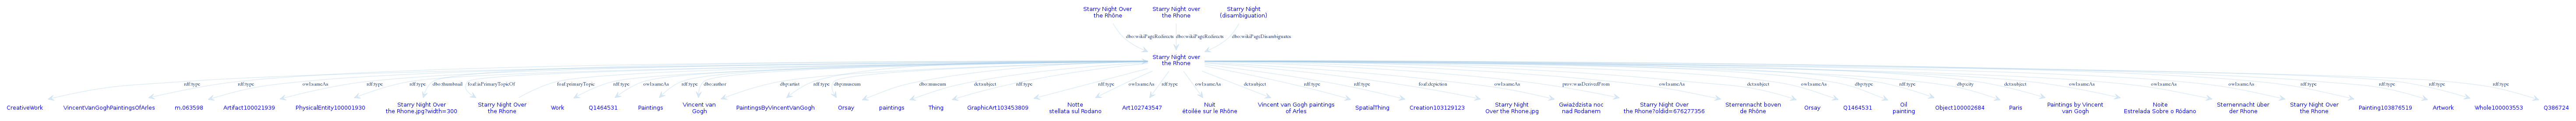

In [7]:
%format n3
%display diagram png
%lang en

PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX foaf:  <http://xmlns.com/foaf/0.1/>
DESCRIBE dbr:Starry_Night_Over_the_Rhone

## Locate paintings

Finally, to print out a slightly more complex graph, we will construct one with all of van Gogh's paintings, together with their location and the country they are in.

This one we render as SVG; this has the said advantage of better quality (being a vector format). Plus nodes and edges can contain hyperlinks, so when they are URIs they point to the full URL (note that, unless the `withliterals` option is used, **all** represented nodes will be URIs)

Return format: N3
Display: svg

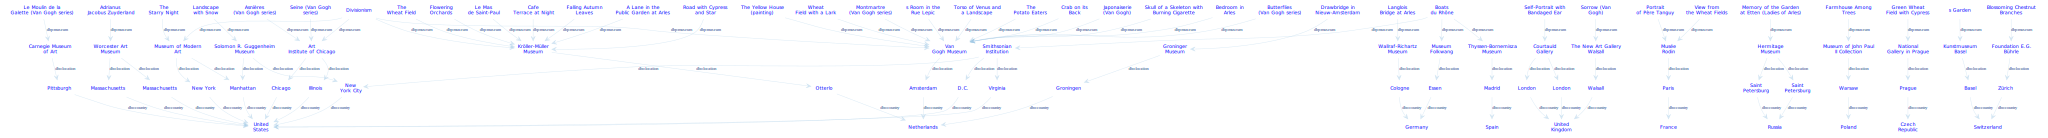

In [9]:
%format n3
%display diagram svg

PREFIX wd: <http://www.wikidata.org/entity/>
CONSTRUCT  { ?painting dbp:museum ?museum .
             ?painting dct:subject ?subject .
             ?museum dbo:location ?location .
             ?location dbo:country ?country .
           }
WHERE {
    ?painting dbp:artist dbr:Vincent_van_Gogh .
    ?painting a wd:Q386724 .
    ?painting a dbo:Artwork .
    ?painting dbp:museum ?museum .
    ?museum dbo:location ?location .
    ?location dbo:country ?country .
}

<div style="border-top: 1px gray solid; font-family: Cursive, sans-serif;">Version: 1.1 (2016-08-10)<br/>
Author: Paulo Villegas</div>